In [25]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
tf.__version__

'2.9.1'

In [10]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [11]:
X_train_full.shape

(60000, 28, 28)

In [12]:
X_train_full.dtype

dtype('uint8')

In [13]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [14]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [15]:
class_names[y_train[0]]

'Coat'

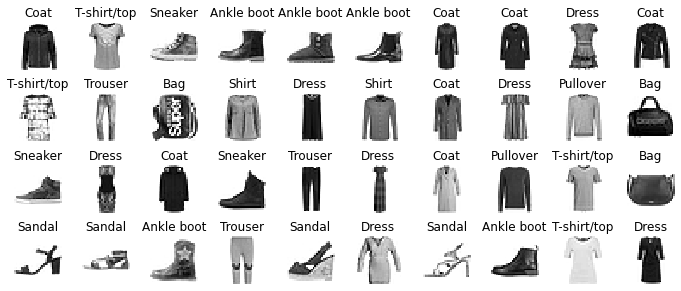

In [23]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [26]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [17]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [18]:
model = keras.models.Sequential([
 keras.layers.Flatten(input_shape=[28, 28]),
 keras.layers.Dense(300, activation="relu"),
 keras.layers.Dense(100, activation="relu"),
 keras.layers.Dense(10, activation="softmax")
])

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [29]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [30]:
hidden1 = model.layers[1]
hidden1.name

'dense_6'

In [31]:
model.get_layer(hidden1.name) is hidden1

True

In [32]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.04018862, -0.03493635, -0.07110495, ..., -0.00577979,
        -0.00965658,  0.06814747],
       [ 0.03773892,  0.03227638,  0.02737256, ...,  0.01046154,
        -0.04316798,  0.00619712],
       [-0.02894997, -0.05971222,  0.01820596, ..., -0.00431228,
         0.05817875, -0.00341663],
       ...,
       [-0.06205361,  0.03858918, -0.07183063, ...,  0.04925389,
         0.03077152, -0.0721597 ],
       [ 0.03477631,  0.05559778,  0.07286848, ...,  0.03788786,
         0.04806827,  0.0656998 ],
       [ 0.01339053,  0.00130845,  0.04462522, ...,  0.03519575,
        -0.05550896, -0.06110371]], dtype=float32)

In [33]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

This equivalent to :
```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

In [34]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30


2022-08-04 02:42:59.493603: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 172480000 exceeds 10% of free system memory.


1719/1719 [==============================] - 8s 4ms/step - loss: 0.7253 - accuracy: 0.7630 - val_loss: 0.5230 - val_accuracy: 0.8224
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4921 - accuracy: 0.8285 - val_loss: 0.4361 - val_accuracy: 0.8516
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4440 - accuracy: 0.8428 - val_loss: 0.5390 - val_accuracy: 0.8000
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4170 - accuracy: 0.8541 - val_loss: 0.3961 - val_accuracy: 0.8652
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3981 - accuracy: 0.8603 - val_loss: 0.3797 - val_accuracy: 0.8694
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3796 - accuracy: 0.8660 - val_loss: 0.3728 - val_accuracy: 0.8732
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3675 - accuracy: 0.8694 - val_loss: 0.3642 - val_accuracy: 0.8758
Epo

In [35]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [36]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [37]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

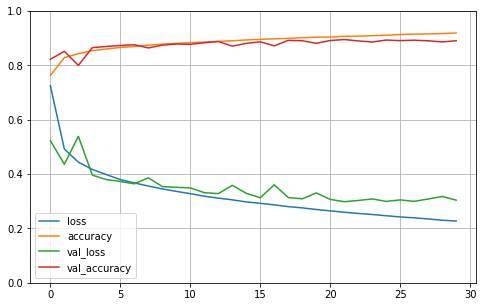

In [38]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [39]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 76.4575 - accuracy: 0.8352


[76.45753479003906, 0.8352000117301941]